# Customer Personality Analysis Machine Learning

In [1]:
# Remove warning.
import os
os.environ['OMP_NUM_THREADS'] = '9'

In [2]:
#pip install xgboost

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Unsupervised Learning Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score


# Supervised Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


# Saving Model
import pickle
import joblib

In [4]:
# Load the processed data
df = pd.read_csv('processed_data.csv')
df

,Education,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumWebVisitsMonth,Complain,...,Parent,Frequency,Monetary,Avg_Purchase_Value,Loyalty,Income_per_Household_Member,High_Spender,Promo_Responsive,Preferred_Category,Engagement_Score
0,Graduate,4136,635,88,546,172,88,88,7,0,...,0,25,1617.0,64.680000,1,58138.000000,1,0,Wines,1
1,Graduate,3586,11,1,6,2,1,6,5,0,...,1,6,27.0,4.500000,0,15448.000000,0,0,Wines,0
2,Graduate,3785,426,49,127,111,21,42,4,0,...,0,21,776.0,36.952381,1,35806.500000,1,0,Wines,0
3,Graduate,3612,11,4,20,10,3,5,6,0,...,1,8,53.0,6.625000,0,8882.000000,0,0,Meat,0
4,Post-Grad,3634,173,43,118,46,27,15,5,0,...,1,19,422.0,22.210526,1,19431.000000,1,0,Wines,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,Graduate,3854,709,43,182,42,118,247,5,0,...,1,18,1341.0,74.500000,1,20407.666667,1,0,Wines,0
2208,Post-Grad,3492,406,0,30,0,0,8,7,0,...,1,22,444.0,20.181818,1,12802.800000,1,1,Wines,0
2209,Graduate,3628,908,48,217,32,12,24,6,0,...,0,19,1241.0,65.315789,1,56981.000000,1,1,Wines,1
2210,Post-Grad,3629,428,30,214,80,30,61,3,0,...,1,23,843.0,36.652174,1,23081.666667,1,0,Wines,0


# Unsupervised Learning

## Features Used

In [5]:
# Define features to use
features = ['Recency', 'Frequency', 'Monetary', 'Avg_Purchase_Value', 
             'Income_per_Household_Member', 'Engagement_Score', 
             'Total_Household', 'Children', 'Promo_Responsive', 'Parent', 
             'Preferred_Category', 'Education', 'Relationship_Status', 'Age']

# Separate categorical and numerical features
categorical_features = ['Preferred_Category', 'Education', 'Relationship_Status']
numerical_features = [f for f in features if f not in categorical_features]

# Create transformers for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

## Preprocess the Data

In [6]:
# Define a Preprocessor function
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(df[features])

# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.joblib')

['preprocessor.joblib']

## Defining & Fitting the model 

In [7]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_preprocessed)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_preprocessed)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_preprocessed)

Z:\AnacondaIoD\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Visualization of the Models

### Using KMeans Cluster

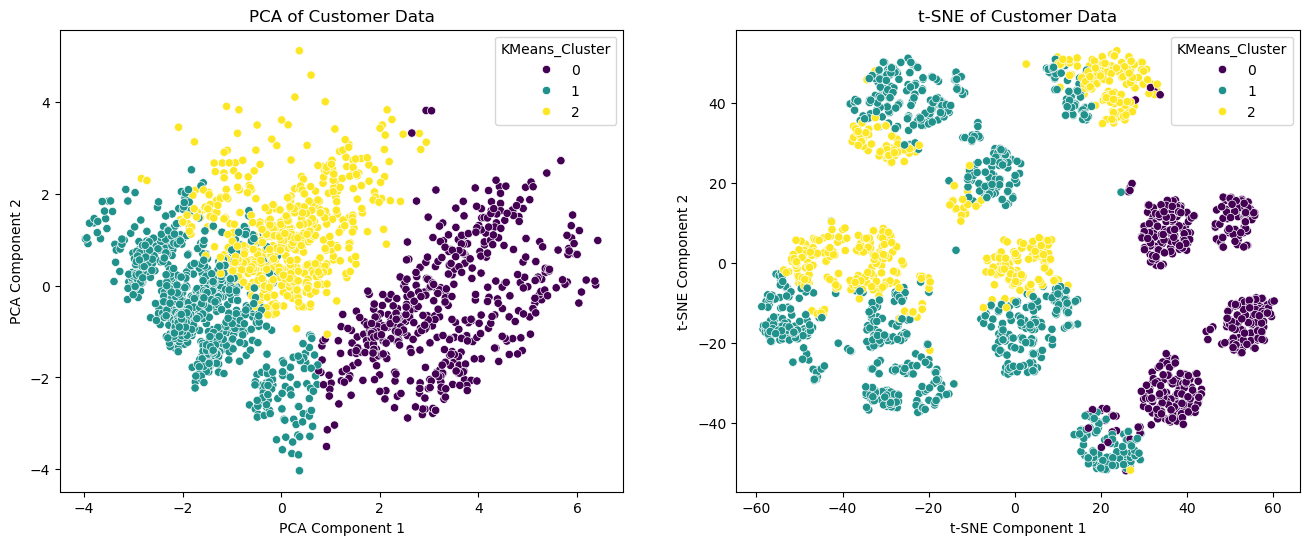

In [8]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 6))

# PCA Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], palette='viridis', legend='full')
plt.title('PCA of Customer Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# t-SNE Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['KMeans_Cluster'], palette='viridis', legend='full')
plt.title('t-SNE of Customer Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.show()


### Using DBSCAN

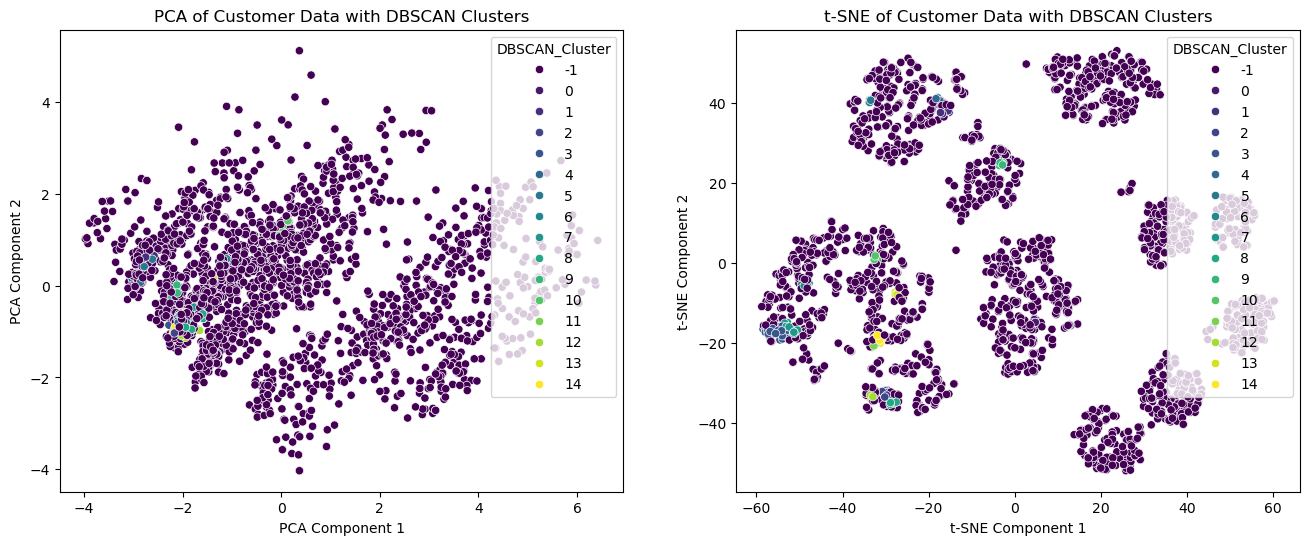

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 6))

# PCA Plot with DBSCAN Clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['DBSCAN_Cluster'], palette='viridis', legend='full')
plt.title('PCA of Customer Data with DBSCAN Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# t-SNE Plot with DBSCAN Clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['DBSCAN_Cluster'], palette='viridis', legend='full')
plt.title('t-SNE of Customer Data with DBSCAN Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.show()


## Evaluating the Models

In [10]:
# Evaluate K-Means
silhouette_kmeans = silhouette_score(X_preprocessed, df['KMeans_Cluster'])
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

# Evaluate DBSCAN (ignore noise points for silhouette score calculation)
if len(set(df['DBSCAN_Cluster'])) > 1:
    silhouette_dbscan = silhouette_score(X_preprocessed, df['DBSCAN_Cluster'])
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')
else:
    print('DBSCAN did not produce clusters (all points are considered noise).')

Silhouette Score for K-Means: 0.1878732290965203
Silhouette Score for DBSCAN: -0.32985004799473927


## Tuning to find the best Parameters

K-Means - n_clusters: 2, Silhouette Score: 0.31161504324539285
K-Means - n_clusters: 3, Silhouette Score: 0.1878732290965203
K-Means - n_clusters: 4, Silhouette Score: 0.1914627578196858
K-Means - n_clusters: 5, Silhouette Score: 0.17384738831209778
K-Means - n_clusters: 6, Silhouette Score: 0.1850381953423145
K-Means - n_clusters: 7, Silhouette Score: 0.18814925313849262
K-Means - n_clusters: 8, Silhouette Score: 0.18522501870720132
K-Means - n_clusters: 9, Silhouette Score: 0.1654881736387369
K-Means - n_clusters: 10, Silhouette Score: 0.15042876257788945


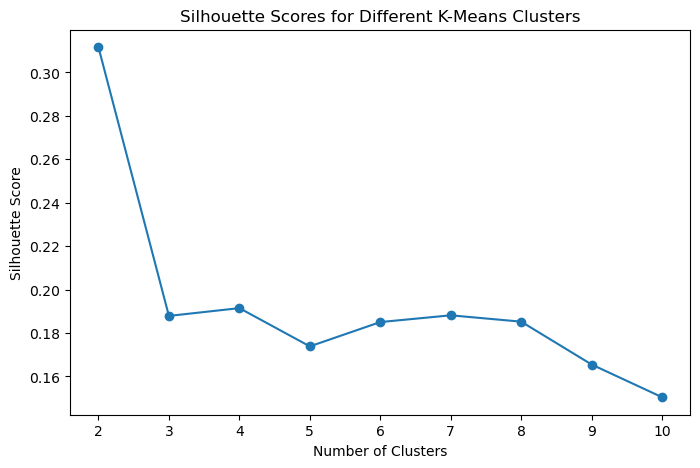

In [11]:
X_preprocessed = preprocessor.fit_transform(df[features])

# K-Means Tuning
def kmeans_tuning(X_scaled):
    cluster_range = range(2, 11)  # Trying from 2 to 10 clusters
    silhouette_scores = []
    
    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
        clusters = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, clusters)
        silhouette_scores.append(score)
        print(f'K-Means - n_clusters: {n_clusters}, Silhouette Score: {score}')
    
    # Plot Elbow method
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different K-Means Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

kmeans_tuning(X_preprocessed)


DBSCAN - eps: 0.100, min_samples: 3, Silhouette Score: -0.34525938671285217
DBSCAN - eps: 0.100, min_samples: 5 did not produce clusters
DBSCAN - eps: 0.100, min_samples: 7 did not produce clusters
DBSCAN - eps: 0.100, min_samples: 10 did not produce clusters
DBSCAN - eps: 0.200, min_samples: 3, Silhouette Score: -0.40735997026832393
DBSCAN - eps: 0.200, min_samples: 5 did not produce clusters
DBSCAN - eps: 0.200, min_samples: 7 did not produce clusters
DBSCAN - eps: 0.200, min_samples: 10 did not produce clusters
DBSCAN - eps: 0.300, min_samples: 3, Silhouette Score: -0.4560185640575503
DBSCAN - eps: 0.300, min_samples: 5, Silhouette Score: -0.1426497129415614
DBSCAN - eps: 0.300, min_samples: 7 did not produce clusters
DBSCAN - eps: 0.300, min_samples: 10 did not produce clusters
DBSCAN - eps: 0.400, min_samples: 3, Silhouette Score: -0.43712423536079975
DBSCAN - eps: 0.400, min_samples: 5, Silhouette Score: -0.24930686007248853
DBSCAN - eps: 0.400, min_samples: 7, Silhouette Score: 

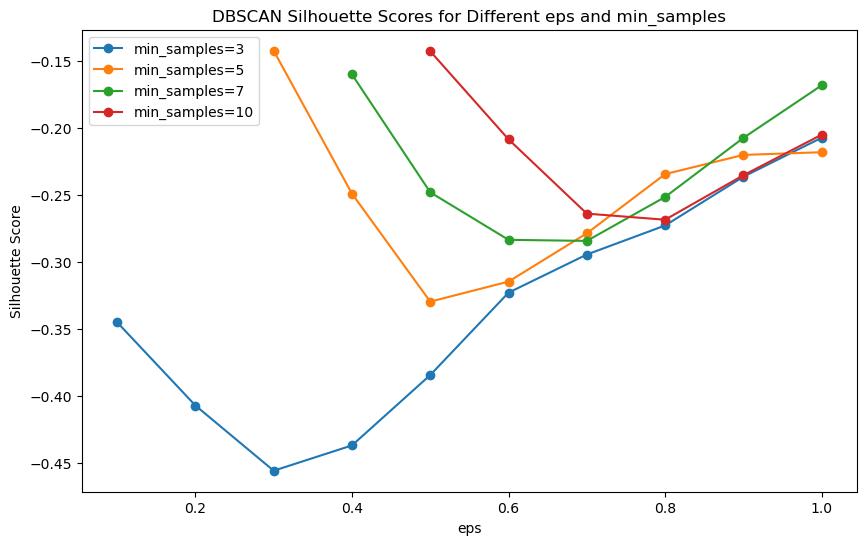

In [12]:
# DBSCAN Tuning
def dbscan_tuning(X_scaled):
    eps_values = np.arange(0.1, 1.01, 0.1)
    min_samples_values = [3, 5, 7, 10]
    dbscan_results = []
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(X_scaled)
            
            # Check if clusters are valid (i.e., not all noise)
            if len(set(clusters)) > 1:
                score = silhouette_score(X_scaled, clusters)
                dbscan_results.append((eps, min_samples, score))
                print(f'DBSCAN - eps: {eps:.3f}, min_samples: {min_samples}, Silhouette Score: {score}')
            else:
                print(f'DBSCAN - eps: {eps:.3f}, min_samples: {min_samples} did not produce clusters')

    # Convert results to DataFrame for easier manipulation
    dbscan_results_df = pd.DataFrame(dbscan_results, columns=['eps', 'min_samples', 'Silhouette_Score'])

    # Plot DBSCAN results
    plt.figure(figsize=(10, 6))
    for min_samples in min_samples_values:
        subset = dbscan_results_df[dbscan_results_df['min_samples'] == min_samples]
        plt.plot(subset['eps'], subset['Silhouette_Score'], marker='o', label=f'min_samples={min_samples}')

    plt.title('DBSCAN Silhouette Scores for Different eps and min_samples')
    plt.xlabel('eps')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.show()

dbscan_tuning(X_preprocessed)


## Inputting the best parameters

Z:\AnacondaIoD\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


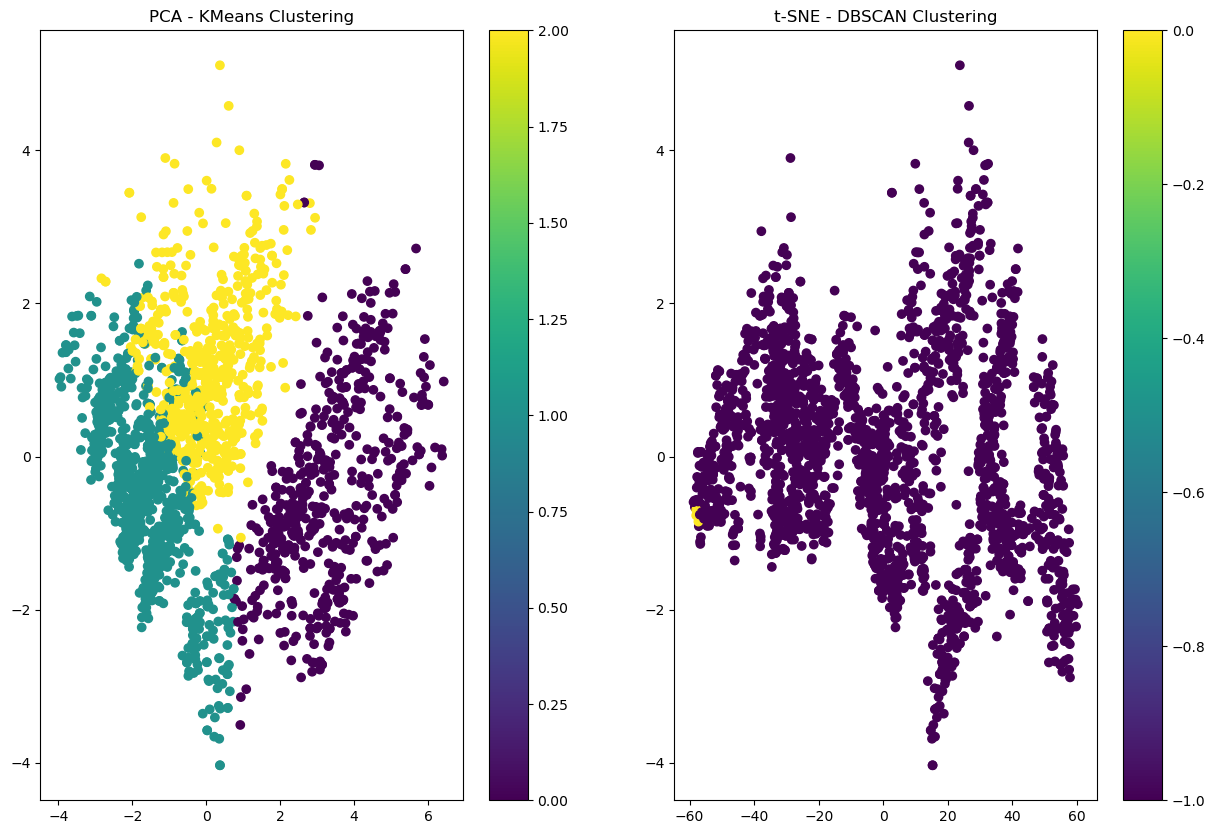

In [13]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_preprocessed)

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_preprocessed)

# Visualising
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['KMeans_Cluster'], cmap='viridis', label='KMeans')
plt.title('PCA - KMeans Clustering')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_pca[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis', label='DBSCAN')
plt.title('t-SNE - DBSCAN Clustering')
plt.colorbar()

In [14]:
# Compute silhouette scores for K-Means and DBSCAN
kmeans_silhouette = silhouette_score(X_pca, df['KMeans_Cluster'])
dbscan_silhouette = silhouette_score(X_pca, df['DBSCAN_Cluster'])

print(f'Silhouette Score for K-Means: {kmeans_silhouette}')
print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')


Silhouette Score for K-Means: 0.3846439417929796
Silhouette Score for DBSCAN: -0.21538973855469493


In [15]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Compute cluster profiles for numerical features
cluster_profiles_kmeans = df.groupby('KMeans_Cluster')[numerical_columns].mean()
cluster_profiles_dbscan = df.groupby('DBSCAN_Cluster')[numerical_columns].mean()

print('Cluster Profiles for K-Means (Numerical Features):')
print(cluster_profiles_kmeans)

print('Cluster Profiles for DBSCAN (Numerical Features):')
print(cluster_profiles_dbscan)


# List of categorical columns
categorical_columns = ['Education', 'Relationship_Status']  # Add other categorical columns if needed

# Analyze the distribution of categorical features within each cluster
for cat_col in categorical_columns:
    print(f'Cluster Distribution for {cat_col}:')
    cluster_distribution = df.groupby('KMeans_Cluster')[cat_col].value_counts(normalize=True).unstack().fillna(0)
    print('K-Means Clustering:')
    print(cluster_distribution)
    
    cluster_distribution_dbscan = df.groupby('DBSCAN_Cluster')[cat_col].value_counts(normalize=True).unstack().fillna(0)
    print('DBSCAN Clustering:')
    print(cluster_distribution_dbscan)


Cluster Profiles for K-Means (Numerical Features):
                    Recency       Wines     Fruits        Meat       Fish  \
KMeans_Cluster                                                              
0               3825.941065  597.129278  60.986692  443.961977  89.250951   
1               3790.265094   48.340566   5.691509   25.985849   8.624528   
2               3889.230032  496.397764  32.410543  174.103834  43.632588   

                    Sweet       Gold  NumWebVisitsMonth  Complain  Response  \
KMeans_Cluster                                                                
0               62.057034  73.226236           2.958175  0.005703  0.323194   
1                5.794340  16.154717           6.314151  0.011321  0.072642   
2               33.722045  66.744409           5.607029  0.009585  0.137380   

                ...  Frequency     Monetary  Avg_Purchase_Value   Loyalty  \
KMeans_Cluster  ...                                                         
0            

# EDA on Cluster Columns

In [16]:
# Overview of clusters
cluster_summary = df[['KMeans_Cluster', 'DBSCAN_Cluster']].copy()

# Count the number of data points in each cluster
cluster_sizes = cluster_summary.groupby('KMeans_Cluster').size()
print("K-Means Cluster Sizes:")
print(cluster_sizes)

cluster_sizes_dbscan = cluster_summary.groupby('DBSCAN_Cluster').size()
print("\nDBSCAN Cluster Sizes:")
print(cluster_sizes_dbscan)


K-Means Cluster Sizes:
KMeans_Cluster
0     526
1    1060
2     626
dtype: int64

DBSCAN Cluster Sizes:
DBSCAN_Cluster
-1    2206
 0       6
dtype: int64


In [17]:
# Statistical summary for K-Means clusters
for cluster in df['KMeans_Cluster'].unique():
    print(f"\nK-Means Cluster {cluster} Summary:")
    print(df[df['KMeans_Cluster'] == cluster].describe())

# Statistical summary for DBSCAN clusters
for cluster in df['DBSCAN_Cluster'].unique():
    print(f"\nDBSCAN Cluster {cluster} Summary:")
    print(df[df['DBSCAN_Cluster'] == cluster].describe())



K-Means Cluster 0 Summary:
           Recency        Wines      Fruits         Meat        Fish  \
count   526.000000   526.000000  526.000000   526.000000  526.000000   
mean   3825.941065   597.129278   60.986692   443.961977   89.250951   
std     204.608575   340.865775   50.495128   258.585195   65.422653   
min    3474.000000     1.000000    0.000000     1.000000    0.000000   
25%    3654.250000   336.000000   22.000000   244.250000   34.000000   
50%    3830.500000   557.000000   44.000000   416.000000   75.000000   
75%    4002.750000   832.250000   93.000000   612.750000  137.000000   
max    4171.000000  1493.000000  197.000000  1725.000000  254.000000   

            Sweet        Gold  NumWebVisitsMonth    Complain    Response  ...  \
count  526.000000  526.000000         526.000000  526.000000  526.000000  ...   
mean    62.057034   73.226236           2.958175    0.005703    0.323194  ...   
std     52.047859   61.647664           2.105358    0.075377    0.468141  ...   

In [18]:
# Example summary
for cluster in df['KMeans_Cluster'].unique():
    cluster_data = df[df['KMeans_Cluster'] == cluster]
    print(f"Cluster {cluster} Overview:")
    print(f"Mean Recency: {cluster_data['Recency'].mean()}")
    print(f"Mean Frequency: {cluster_data['Frequency'].mean()}")
    print(f"Mean Monetary: {cluster_data['Monetary'].mean()}")
    print(f"Mean Avg_Purchase_Value: {cluster_data['Avg_Purchase_Value'].mean()}")
    print(f"Mean Income_per_Household_Member: {cluster_data['Income_per_Household_Member'].mean()}")
    print(f"Mean Engagement_Score: {cluster_data['Engagement_Score'].mean()}")
    print(f"Number of Data Points: {cluster_data.shape[0]}")
    print()


Cluster 0 Overview:
Mean Recency: 3825.9410646387832
Mean Frequency: 19.76425855513308
Mean Monetary: 1319.2281368821293
Mean Avg_Purchase_Value: 68.35151665648942
Mean Income_per_Household_Member: 52098.209759188845
Mean Engagement_Score: 0.8288973384030418
Number of Data Points: 526

Cluster 1 Overview:
Mean Recency: 3790.2650943396225
Mean Frequency: 8.326415094339623
Mean Monetary: 110.59150943396226
Mean Avg_Purchase_Value: 11.422047015085342
Mean Income_per_Household_Member: 13077.809481132077
Mean Engagement_Score: 0.14622641509433962
Number of Data Points: 1060

Cluster 2 Overview:
Mean Recency: 3889.230031948882
Mean Frequency: 21.971246006389777
Mean Monetary: 846.9025559105431
Mean Avg_Purchase_Value: 38.704458543343065
Mean Income_per_Household_Member: 22171.875665601703
Mean Engagement_Score: 0.402555910543131
Number of Data Points: 626



# Supervised Learning

## Using the KMeans Cluster

In [25]:
# Ensure correct columns in DataFrame
print(df.columns)

# Update features list if needed
features_with_clusters = ['Recency', 'Frequency', 'Monetary', 'Avg_Purchase_Value', 
                           'Income_per_Household_Member', 'Engagement_Score', 
                           'Total_Household', 'Children', 'Promo_Responsive', 'Parent', 
                           'KMeans_Cluster', 'DBSCAN_Cluster', 'Education',
                          'Relationship_Status', 'Age', 'Preferred_Category']

# Check if all features are in the DataFrame
missing_features = [feature for feature in features_with_clusters if feature not in df.columns]
if missing_features:
    print(f"Missing features: {missing_features}")
else:
    print("All features are present in the DataFrame.")

Index(['Education', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet',
       'Gold', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'Relationship_Status', 'Children', 'Total_Household', 'Parent',
       'Frequency', 'Monetary', 'Avg_Purchase_Value', 'Loyalty',
       'Income_per_Household_Member', 'High_Spender', 'Promo_Responsive',
       'Preferred_Category', 'Engagement_Score', 'KMeans_Cluster',
       'DBSCAN_Cluster'],
      dtype='object')
All features are present in the DataFrame.


In [26]:
#Predicting K-Means clusters
X = df[features_with_clusters]  # Features
y = df['High_Spender']  # Target

In [27]:
print("DataFrame Columns:", df.columns)


DataFrame Columns: Index(['Education', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet',
       'Gold', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'Relationship_Status', 'Children', 'Total_Household', 'Parent',
       'Frequency', 'Monetary', 'Avg_Purchase_Value', 'Loyalty',
       'Income_per_Household_Member', 'High_Spender', 'Promo_Responsive',
       'Preferred_Category', 'Engagement_Score', 'KMeans_Cluster',
       'DBSCAN_Cluster'],
      dtype='object')


In [28]:
# Defining Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

## Defining Classifiers Used

In [29]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='mlogloss'),
}

# Dictionary to store metrics and ROC/AUC scores
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC Score': []
}

## Train, Evaluate and collect Metrics

In [31]:
# Update features list if needed
features_with_clusters = ['Recency', 'Frequency', 'Monetary', 'Avg_Purchase_Value', 
                           'Income_per_Household_Member', 'Engagement_Score', 
                           'Total_Household', 'Children', 'Promo_Responsive', 'Parent', 
                           'KMeans_Cluster', 'DBSCAN_Cluster', 'Education', 'Relationship_Status', 'Age', 'Preferred_Category']

# Check if all features are in the DataFrame
missing_features = [feature for feature in features_with_clusters if feature not in df.columns]
if missing_features:
    print(f"Missing features: {missing_features}")
else:
    print("All features are present in the DataFrame.")

All features are present in the DataFrame.


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       214

    accuracy                           1.00       443
   macro avg       1.00      1.00      1.00       443
weighted avg       1.00      1.00      1.00       443




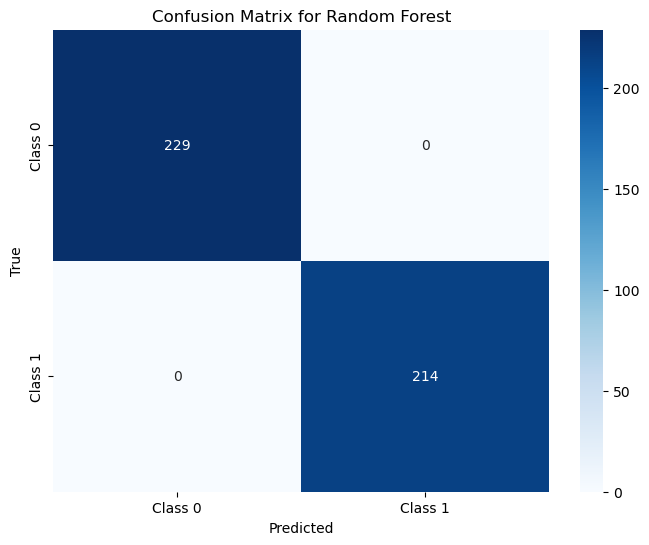

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       229
           1       0.99      0.98      0.99       214

    accuracy                           0.99       443
   macro avg       0.99      0.99      0.99       443
weighted avg       0.99      0.99      0.99       443




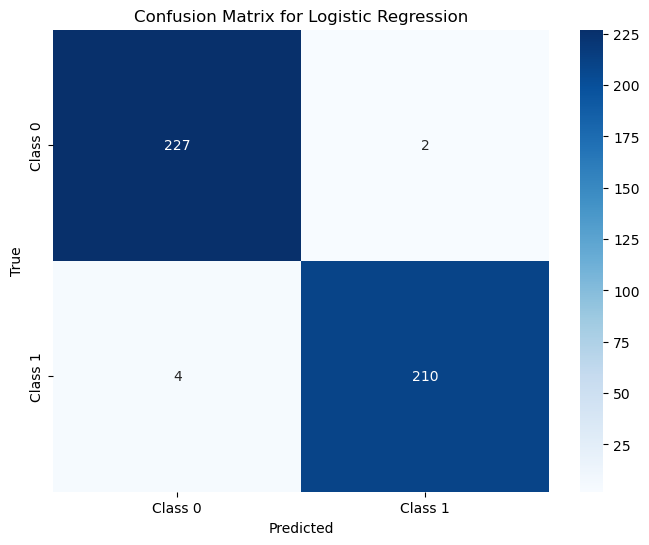

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       214

    accuracy                           1.00       443
   macro avg       1.00      1.00      1.00       443
weighted avg       1.00      1.00      1.00       443




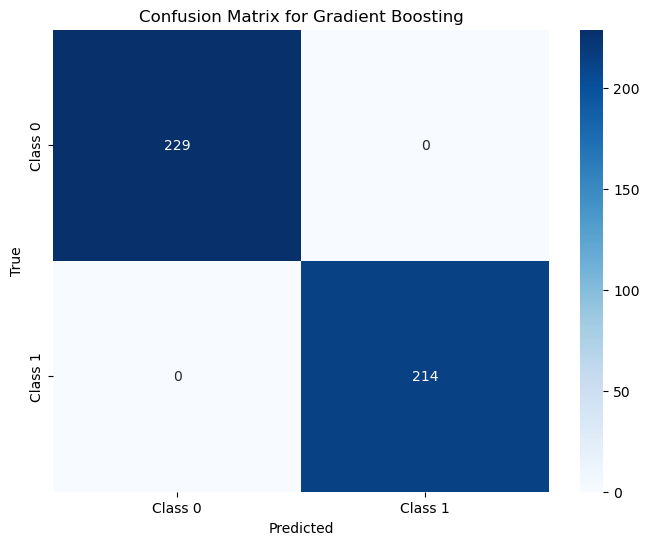

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       229
           1       0.99      0.98      0.99       214

    accuracy                           0.99       443
   macro avg       0.99      0.99      0.99       443
weighted avg       0.99      0.99      0.99       443




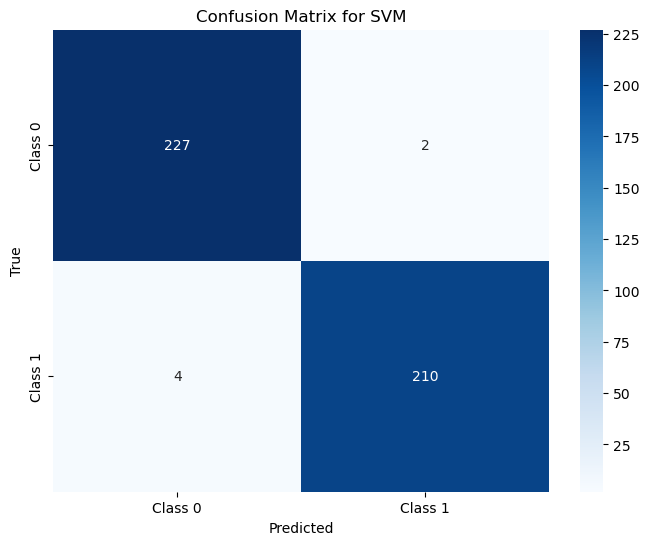

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       229
           1       0.97      0.96      0.97       214

    accuracy                           0.97       443
   macro avg       0.97      0.97      0.97       443
weighted avg       0.97      0.97      0.97       443




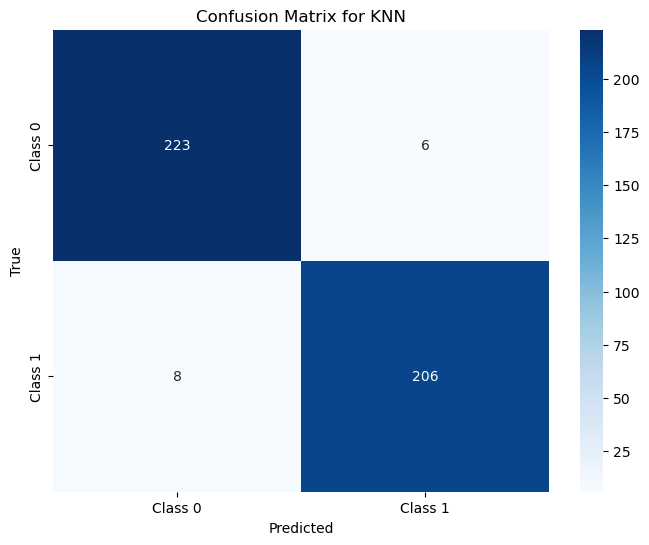

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       229
           1       0.80      0.98      0.88       214

    accuracy                           0.88       443
   macro avg       0.89      0.88      0.88       443
weighted avg       0.89      0.88      0.87       443




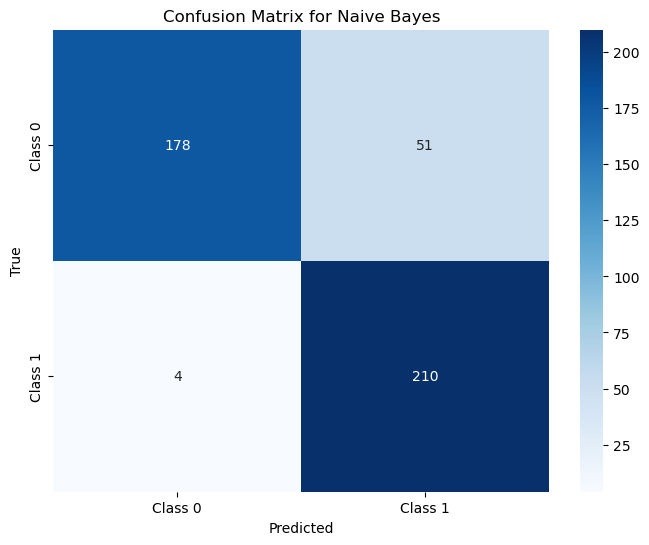

Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       214

    accuracy                           1.00       443
   macro avg       1.00      1.00      1.00       443
weighted avg       1.00      1.00      1.00       443




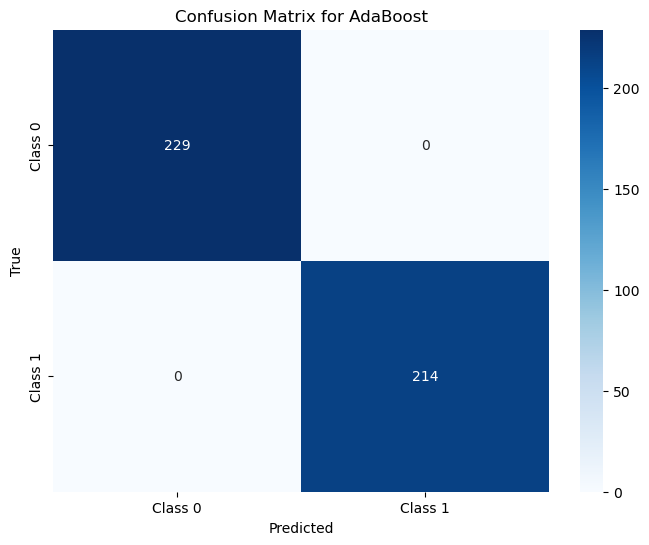

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       214

    accuracy                           1.00       443
   macro avg       1.00      1.00      1.00       443
weighted avg       1.00      1.00      1.00       443




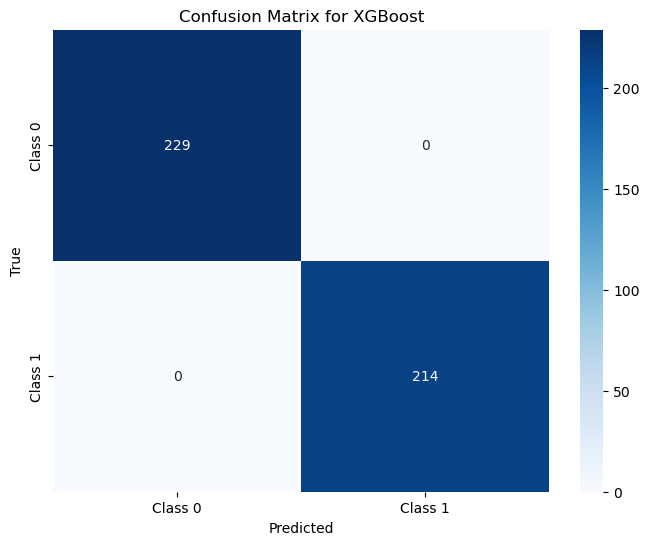

In [32]:
for model_name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    
    try:
        y_prob = model.predict_proba(X_test_transformed)[:, 1]  # Probability estimates for ROC/AUC
        roc_auc = roc_auc_score(y_test, y_prob)
    except (AttributeError, IndexError):
        # Handle models that do not support predict_proba or have issues with output shape
        y_prob = None
        roc_auc = None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append results
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['ROC AUC Score'].append(roc_auc if roc_auc is not None else 'N/A')
    
    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print()
    
    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Class 0', 'Class 1'], 
                yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

## Display Results

In [33]:
# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score  ROC AUC Score
0        Random Forest  1.000000   1.000000  1.000000  1.000000       1.000000
1  Logistic Regression  0.986456   0.990566  0.981308  0.985915       0.998388
2    Gradient Boosting  1.000000   1.000000  1.000000  1.000000       1.000000
3                  SVM  0.986456   0.990566  0.981308  0.985915       0.999388
4                  KNN  0.968397   0.971698  0.962617  0.967136       0.996674
5          Naive Bayes  0.875847   0.804598  0.981308  0.884211       0.980094
6             AdaBoost  1.000000   1.000000  1.000000  1.000000       1.000000
7              XGBoost  1.000000   1.000000  1.000000  1.000000       1.000000


## Visualising ROC

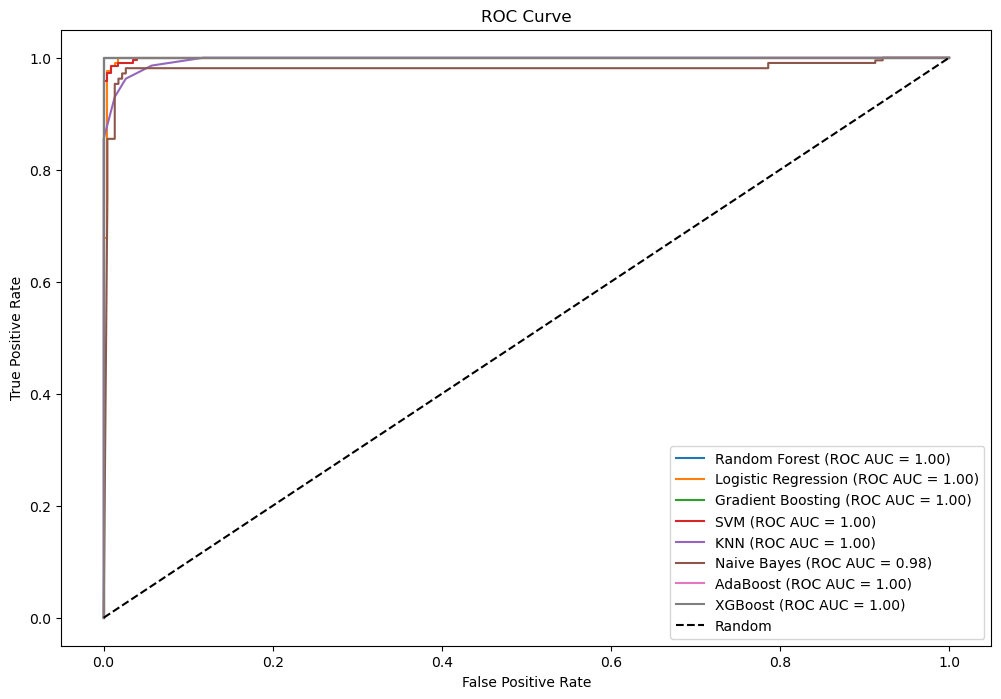

In [34]:
plt.figure(figsize=(12, 8))
for model_name, model in models.items():
    y_prob = model.predict_proba(X_test_transformed)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (ROC AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

## Performing Cross-Validation

In [35]:
# Cross-validation results dictionary
cv_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC Score': []
}

# Apply preprocessing to the feature set
X_transformed = preprocessor.fit_transform(X)

# Perform cross-validation for each model
for model_name, model in models.items():
    cv_results['Model'].append(model_name)
    
    # Perform cross-validation
    cv_scores = cross_validate(model, X_transformed, y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
    
    cv_results['Accuracy'].append(cv_scores['test_accuracy'].mean())
    cv_results['Precision'].append(cv_scores['test_precision'].mean())
    cv_results['Recall'].append(cv_scores['test_recall'].mean())
    cv_results['F1 Score'].append(cv_scores['test_f1'].mean())
    cv_results['ROC AUC Score'].append(cv_scores['test_roc_auc'].mean())

In [36]:
# Create a DataFrame for cross-validation results
cv_results_df = pd.DataFrame(cv_results)

# Print the cross-validation results
print(cv_results_df)

                 Model  Accuracy  Precision    Recall  F1 Score  ROC AUC Score
0        Random Forest  1.000000   1.000000  1.000000  1.000000       1.000000
1  Logistic Regression  0.984171   0.986416  0.981945  0.984160       0.998104
2    Gradient Boosting  1.000000   1.000000  1.000000  1.000000       1.000000
3                  SVM  0.984170   0.983795  0.984660  0.984205       0.998846
4                  KNN  0.960665   0.967172  0.953960  0.960482       0.990899
5          Naive Bayes  0.799227   0.729764  0.982850  0.835074       0.981667
6             AdaBoost  1.000000   1.000000  1.000000  1.000000       1.000000
7              XGBoost  0.999096   1.000000  0.998194  0.999095       1.000000


# Saving the Model

In [37]:
# Dictionary of models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='mlogloss'),
}

# Fit and save all models
for model_name, model in models.items():
    model.fit(X_train_transformed, y_train)
    joblib.dump(model, f'{model_name.replace(" ", "_").lower()}_model.joblib')
